In [164]:
import pandas
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve
from matplotlib import pyplot

In [165]:
dataset = pandas.read_csv("Titanic.csv")
initialSize = dataset.shape[0]

dataset.dropna(subset=dataset.columns.difference(['Sex', 'Embarked']), inplace=True)
dataset['Embarked'] = pandas.factorize(dataset['Embarked'])[0]
dataset['Sex'] = pandas.factorize(dataset['Sex'])[0]
dataset.drop(columns=['PassengerId'], inplace=True)

newSize = dataset.shape[0]
print(f'{(1 - newSize / initialSize) * 100:.2f}% of data is lost')

79.24% of data is lost


In [166]:
datasetFeatures = dataset[dataset.columns.difference(['Survived', 'Name', 'Ticket', 'Cabin'])] # excluded few more columns i think not so important
X_train, X_test, Y_train, Y_test = train_test_split(datasetFeatures, dataset['Survived'], test_size=0.2, random_state=0)
regression = LogisticRegression(random_state=0)
regression.fit(X_train, Y_train)

print("Score:", regression.score(X_test, Y_test))

Score: 0.7567567567567568


In [167]:
datasetFeatures = datasetFeatures[datasetFeatures.columns.difference(['Embarked'])]
X_train, X_test, Y_train, Y_test = train_test_split(datasetFeatures, dataset['Survived'], test_size=0.2, random_state=0)
# this part is in another cell because this data will be used in multiple models

In [168]:
regression = LogisticRegression(random_state=0)
regression.fit(X_train, Y_train)

print("Score:", regression.score(X_test, Y_test))   

Score: 0.7567567567567568


Как можно заметить, влияние признака Embarked на результат достаточно малое

Precision:  0.7857142857142857
Recall:  0.88
F1:  0.8301886792452831


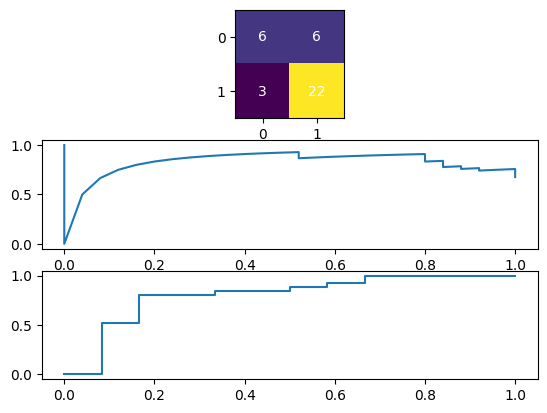

In [169]:
Y_predicted = regression.predict(X_test)

print("Precision: ", precision_score(Y_test, Y_predicted))
print("Recall: ", recall_score(Y_test, Y_predicted))
print("F1: ", f1_score(Y_test, Y_predicted))

matrix = confusion_matrix(Y_test, Y_predicted)

fig, (ax1, ax2, ax3) = pyplot.subplots(3)
ax1.imshow(matrix)
for i in range(len(matrix)):
    for j in range(len(matrix[0])):
        text = ax1.text(j, i, matrix[i, j],
                       ha="center", va="center", color="w")
    


Y_scores = regression.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(Y_test, Y_scores)
ax2.plot(recall, precision)

fpr, tpr, _ = roc_curve(Y_test, Y_scores)
ax3.plot(fpr, tpr)

Таким образом, можно сказать, что модель получилась несколько неточной

In [170]:
classifier = SVC(random_state=0, probability=True)
classifier.fit(X_train, Y_train)

SVC(probability=True, random_state=0)

Precision:  0.6756756756756757
Recall:  1.0
F1:  0.8064516129032258


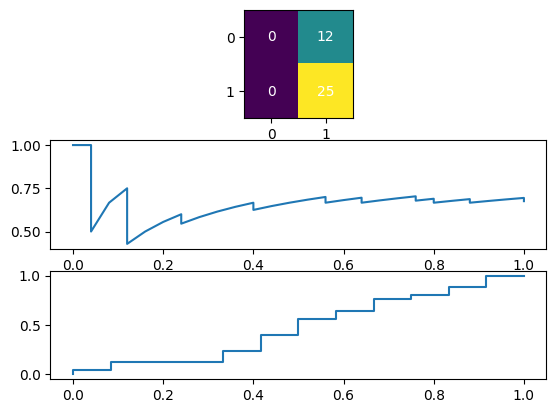

In [171]:
Y_predicted = classifier.predict(X_test)

print("Precision: ", precision_score(Y_test, Y_predicted))
print("Recall: ", recall_score(Y_test, Y_predicted))
print("F1: ", f1_score(Y_test, Y_predicted))

matrix = confusion_matrix(Y_test, Y_predicted)

fig, (ax1, ax2, ax3) = pyplot.subplots(3)
ax1.imshow(matrix)
for i in range(len(matrix)):
    for j in range(len(matrix[0])):
        text = ax1.text(j, i, matrix[i, j],
                       ha="center", va="center", color="w")
    


Y_scores = classifier.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(Y_test, Y_scores)
ax2.plot(recall, precision)

fpr, tpr, _ = roc_curve(Y_test, Y_scores)
ax3.plot(fpr, tpr)

Можно предположить, что данные исходной модели не предназначены для классификации методом опорных векторов, ведь из матрицы ошибок можно увидеть, что вся выборка была определена в один класс

In [172]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

Precision:  0.65625
Recall:  0.84
F1:  0.7368421052631579


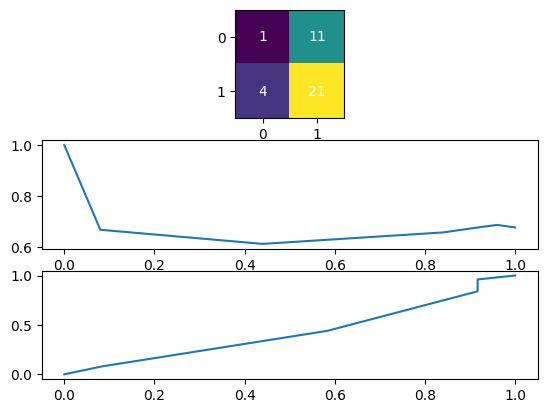

In [173]:
Y_predicted = classifier.predict(X_test)

print("Precision: ", precision_score(Y_test, Y_predicted))
print("Recall: ", recall_score(Y_test, Y_predicted))
print("F1: ", f1_score(Y_test, Y_predicted))

matrix = confusion_matrix(Y_test, Y_predicted)

fig, (ax1, ax2, ax3) = pyplot.subplots(3)
ax1.imshow(matrix)
for i in range(len(matrix)):
    for j in range(len(matrix[0])):
        text = ax1.text(j, i, matrix[i, j],
                       ha="center", va="center", color="w")
    


Y_scores = classifier.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(Y_test, Y_scores)
ax2.plot(recall, precision)

fpr, tpr, _ = roc_curve(Y_test, Y_scores)
ax3.plot(fpr, tpr)

Эта же модель по точности для исходных условий находится между моделью опорных векторов и логистической

# Вывод
Для данного набора данных лучше всего себя показала логистическая модель